In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.5/393.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c0e5d20a7ac59a4891978b9691afa4194b750b52ddf8036ef8e06253945726e0
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Small Reviews.csv to Small Reviews.csv


In [ ]:
df = pd.read_csv("/content/Small Reviews.csv")

In [ ]:
profile = ProfileReport(
    df, title="Small Reviews" , html={"style": {"full_width": True}}, sort=None
)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df = df[['Name', 'Reviews']]

In [ ]:
df['Name'] = df['Name'].fillna('Unknown')

<ipython-input-11-9cff99443507>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'] = df['Name'].fillna('Unknown')


In [ ]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [ ]:
df['Cleaned_Reviews'] = df['Reviews'].apply(clean_text)
df['Cleaned_Name'] = df['Name'].apply(clean_text)

In [ ]:
df.head()

,Name,Reviews,Cleaned_Reviews,Cleaned_Name
0,Ken Tucker,The pleasure to be taken from 'Office' isn't m...,pleasure taken office isnt merely laughter ple...,ken tucker
1,Unknown,"As ever, it's all in the details.",ever details,unknown
2,Unknown,It takes a little while to get into it (episod...,takes little get episode two clinched get used...,unknown
3,Monica Collins,"""The Office"" makes you cringe in delight and h...",office makes cringe delight heave giggles see ...,monica collins
4,Matthew Gilbert,"It is depressing, brilliant, hysterical, excru...",depressing brilliant hysterical excruciating f...,matthew gilbert


In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
from gensim.models import Word2Vec
import numpy as np

sentences = [review.split() for review in df['Cleaned_Reviews']]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def get_w2v_vector(text):
    words = text.split()
    vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X = np.array([get_w2v_vector(review) for review in df['Cleaned_Reviews']])

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def vader_label(review):
    score = sia.polarity_scores(review)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['VADER_Pred'] = df['Cleaned_Reviews'].apply(vader_label)

In [ ]:
from imblearn.over_sampling import SMOTE

# ใช้ SMOTE โดยลดค่า k_neighbors ลง
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# เช็กจำนวนคลาสหลัง Resampling
print(y_train_resampled.value_counts())

Label
Neutral     29
Positive    29
Negative    29
Name: count, dtype: int64


In [ ]:
print(f'Train set: {X_train_resampled.shape}, Test set: {X_test.shape}')

Train set: (87, 100), Test set: (10, 100)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# สร้างโมเดล
nb_model = MultinomialNB()
svm_model = SVC(kernel='linear', probability=True)

# Train โมเดล
nb_model.fit(X_train_resampled, y_train_resampled)
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear', probability=True)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import time

# ฟังก์ชันประเมินผลและวัดเวลา
def predict_and_evaluate(model, X_test, y_test):
    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time

    # ตรวจสอบคลาสที่มีอยู่จริงใน y_test
    unique_labels = sorted(set(y_test))  # หาคลาสที่มีจริง ๆ

    # แสดงผลลัพธ์
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, labels=unique_labels, target_names=[ "Negative", "Positive"] if len(unique_labels) == 2 else ["Negative", "Neutral", "Positive"])

    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print(f"Prediction Time: {predict_time:.4f} sec")

    return y_pred, accuracy, predict_time

# ใช้โมเดล Naive Bayes
print("Naive Bayes Results:")
nb_pred, nb_acc, nb_pred_time = predict_and_evaluate(nb_model, X_test, y_test)

# ใช้โมเดล SVM
print("\nSVM Results:")
svm_pred, svm_acc, svm_pred_time = predict_and_evaluate(svm_model, X_test, y_test)

Naive Bayes Results:
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.89      0.89         9
    Positive       0.00      0.00      0.00         1

    accuracy                           0.80        10
   macro avg       0.44      0.44      0.44        10
weighted avg       0.80      0.80      0.80        10

Prediction Time: 0.0007 sec

SVM Results:
Accuracy: 0.40
Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.44      0.62         9
    Positive       0.00      0.00      0.00         1

   micro avg       1.00      0.40      0.57        10
   macro avg       0.50      0.22      0.31        10
weighted avg       0.90      0.40      0.55        10

Prediction Time: 0.0007 sec


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naive Bayes Accuracy: 0.80
SVM Accuracy: 0.40


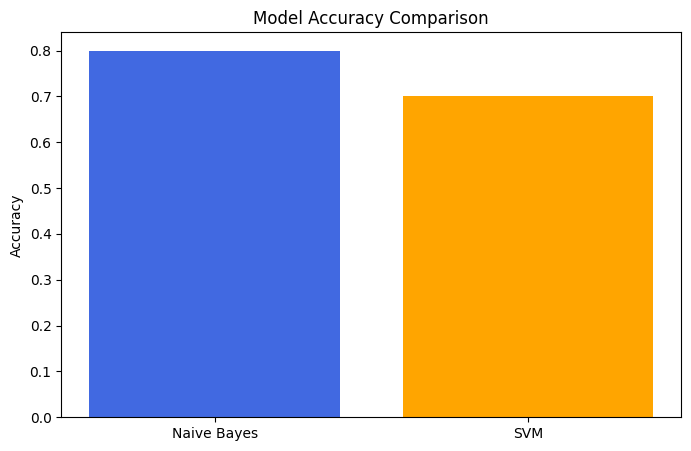

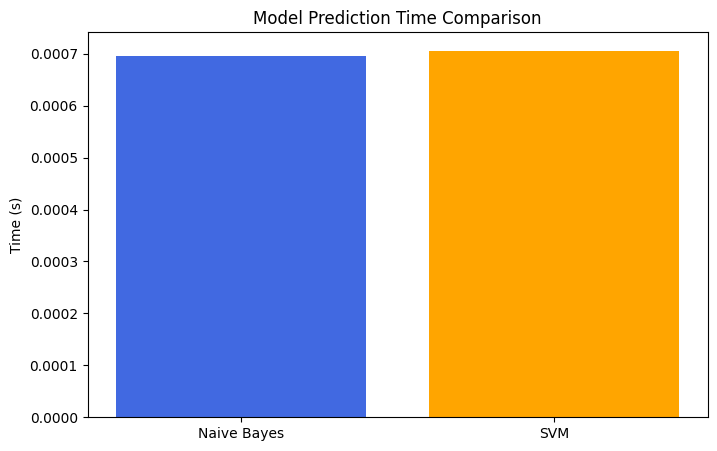

In [62]:
import matplotlib.pyplot as plt

# ข้อมูลเปรียบเทียบ
models = ['Naive Bayes', 'SVM']
nb_acc = accuracy_score(y_test, nb_pred)
svm_acc = accuracy_score(y_test, svm_pred)
predict_time = [nb_pred_time, svm_pred_time]

print(f'Naive Bayes Accuracy: {nb_acc:.2f}')
print(f'SVM Accuracy: {svm_acc:.2f}')

# กราฟความแม่นยำ
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color=['royalblue', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# กราฟเวลาในการทำนาย
plt.figure(figsize=(8, 5))
plt.bar(models, predict_time, color=['royalblue', 'orange'])
plt.title('Model Prediction Time Comparison')
plt.ylabel('Time (s)')
plt.show()

In [64]:
import joblib

w2v_model.save("word2vec.model")

joblib.dump(nb_model, "naive_bayes.pkl")
joblib.dump(svm_model, "svm.pkl")
joblib.dump(sia, "sentiment_analyzer.pkl")
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_test,"y_test.pkl")

['y_test.pkl']